<a href="https://colab.research.google.com/github/kwangsun1999/dap2023_2/blob/main/holiday_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **날짜별로 교통량이 몰리는 시간대**
날짜별로 교통량이 모이는 시간대를 분석하기 위해서 도로교통공단의 월별 교통량 데이터를 가져와보았다.
이 자료의 목적은 과연 추석과 황금연휴가 껴있는 10월초부터 10월 3일까지 교통량이 몰리는가이다. 결과는 밑에 있는 그래프를 보다시피 황금연휴가 껴있고 추석이 끝나는 시점인 10월 1일에 가장 교통량이 밀리는 것을 볼 수 있다. 그리고 10월 3일은 가장 적은데 개인적인 생각으로 그 이유는 휴일이 끝나는 시점이라 출근 준비를 위해서 그 전날에 올라오는 사람들이 많아서 그렇다고 생각한다.

<ipython-input-22-961592a0c841>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traffic['집계일자'] = data_traffic['집계일자'].dt.date


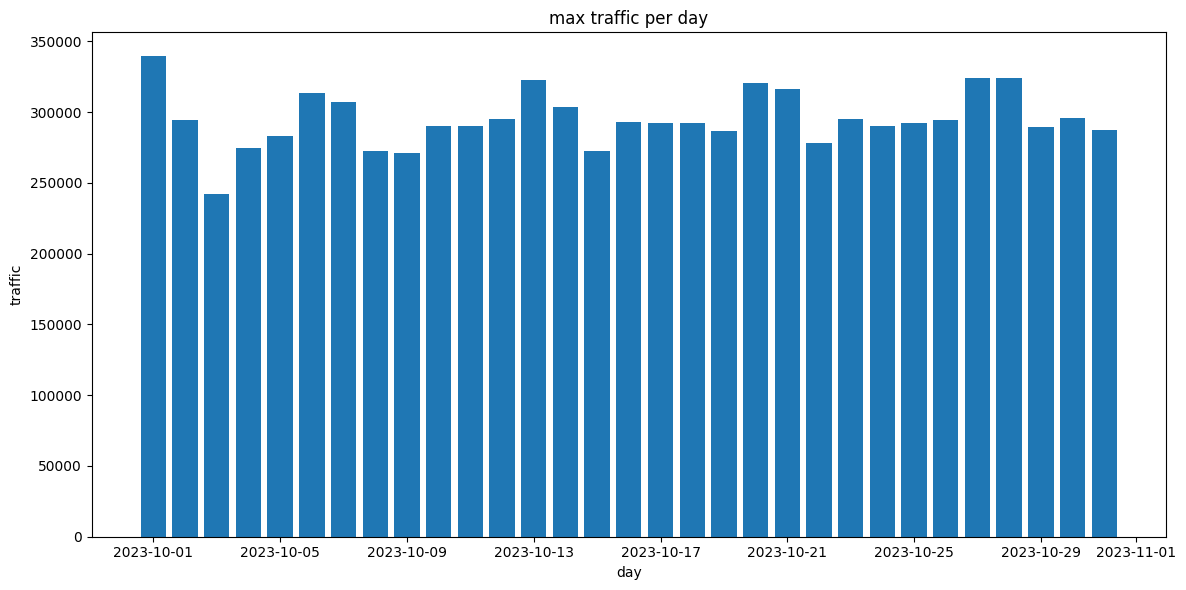

교통량이 가장 많은 날짜와 교통량:
 집계일자    2023-10-01
총교통량       3393879
Name: 60, dtype: object


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

df_traffic = pd.read_csv("https://raw.githubusercontent.com/kwangsun1999/dap2023_2/main/traffic.csv")
df_traffic['집계일자'] = pd.to_datetime(df_traffic['집계일자'])
data_traffic = df_traffic[['집계일자', '총교통량']]
data_traffic['집계일자'] = data_traffic['집계일자'].dt.date

# 각 날짜별로 가장 큰 교통량을 가진 행 찾기
data_traffic = data_traffic.loc[df_traffic.groupby('집계일자')['총교통량'].idxmax()]
#날짜별로 교통량을 나타낸 그래프(y축을 표현할때 십만 단위가 넘어가면 소수점으로 표기되기에 10으로 나누었음)
#(y축은 10을 곱해서 보면 된다.)
max_traffic_row = data_traffic.loc[data_traffic['총교통량'].idxmax()]
plt.figure(figsize=(12, 6))
plt.bar(data_traffic['집계일자'], data_traffic['총교통량']/10)
plt.title('max traffic per day')
plt.xlabel('day')
plt.ylabel('traffic')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print("교통량이 가장 많은 날짜와 교통량:\n", max_traffic_row)